### Visualization of output from conv2d

Input Image Shape: torch.Size([1, 3, 128, 128])
Feature Map 1 Shape: torch.Size([1, 8, 128, 128])
Feature Map 2 Shape: torch.Size([1, 16, 128, 128])
Feature Map 3 Shape: torch.Size([1, 32, 128, 128])


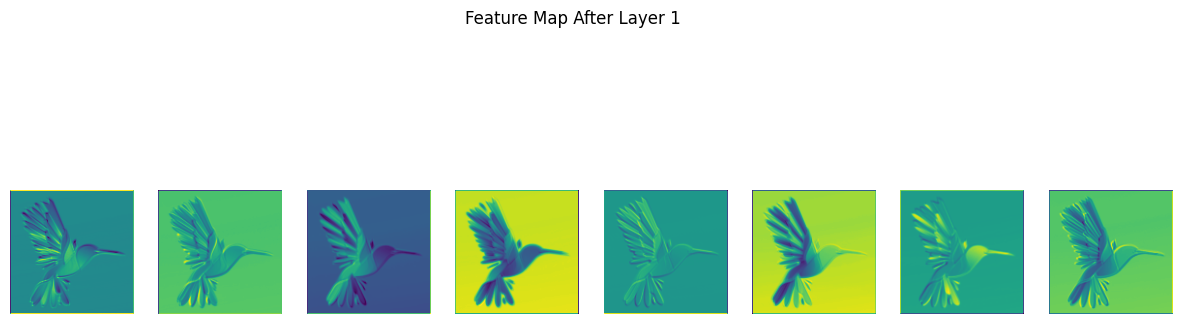

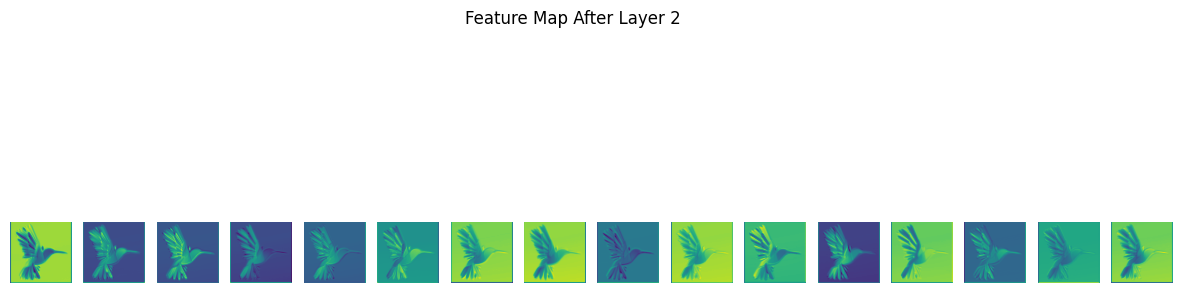

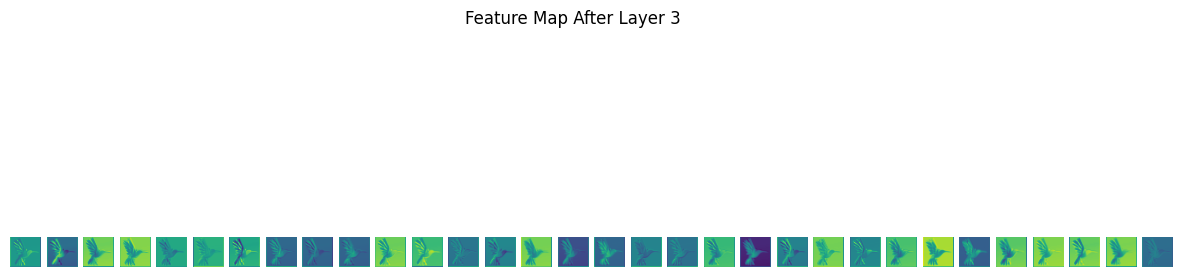

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# ----------------------------
# Define a simple CNN
# ----------------------------
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.layer1 = nn.Conv2d(3, 8, kernel_size=3, padding=1)  # Output: 8xHxW
        self.layer2 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # Output: 16xHxW
        self.layer3 = nn.Conv2d(16, 32, kernel_size=3, padding=1) # Output: 32xHxW
    
    def forward(self, x):
        fmap1 = self.layer1(x)
        fmap2 = self.layer2(fmap1)
        fmap3 = self.layer3(fmap2)
        return fmap1, fmap2, fmap3

# ----------------------------
# Load and preprocess an image
# ----------------------------
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load any image (example)
img = Image.open(r"D:\Learning\Python_DeepLearning\art.jpg").convert('RGB')
input_tensor = transform(img).unsqueeze(0)  # Shape: [1, 3, 128, 128]

# ----------------------------
# Forward pass through CNN
# ----------------------------
model = SimpleCNN()
fmap1, fmap2, fmap3 = model(input_tensor)

print(f"Input Image Shape: {input_tensor.shape}")
print(f"Feature Map 1 Shape: {fmap1.shape}")
print(f"Feature Map 2 Shape: {fmap2.shape}")
print(f"Feature Map 3 Shape: {fmap3.shape}")

# ----------------------------
# Visualize feature maps
# ----------------------------
def visualize_feature_map(fmap, title):
    #print("here_1",fmap.shape)
    fmap = fmap.squeeze(0)  # Remove batch dim -> [C, H, W]
    #print("here_2",fmap.shape)
    num_channels = fmap.shape[0]
    #print(num_channels)
    plt.figure(figsize=(15, 5))
    for i in range(max(num_channels, 8)):  # Show up to 8 channels
        plt.subplot(1, num_channels, i+1)
        plt.imshow(fmap[i].detach().cpu(), cmap='viridis')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

visualize_feature_map(fmap1, "Feature Map After Layer 1")
visualize_feature_map(fmap2, "Feature Map After Layer 2")
visualize_feature_map(fmap3, "Feature Map After Layer 3")


### Feature map

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

# ----------------------------
# Define CNN with feature vector output
# ----------------------------
class SimpleCNNWithVector(nn.Module):
    def __init__(self):
        super(SimpleCNNWithVector, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),   # Output: 8xHxW
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, padding=1),  # Output: 16xHxW
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, padding=1), # Output: 32xHxW
            nn.ReLU()
        )
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))  # Converts to [B, C, 1, 1]
        self.flatten = nn.Flatten()  # Converts to [B, C]

    def forward(self, x):
        fmap = self.features(x)
        pooled = self.global_pool(fmap)
        vector = self.flatten(pooled)
        return vector

# ----------------------------
# Load and preprocess an image
# ----------------------------
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

img = Image.open(r"D:\Learning\Python_DeepLearning\art.jpg").convert('RGB')
input_tensor = transform(img).unsqueeze(0)  # [1, 3, 128, 128]

# ----------------------------
# Forward pass to get feature vector
# ----------------------------
model = SimpleCNNWithVector()
feature_vector = model(input_tensor)

print(f"Input Image Shape: {input_tensor.shape}")
print(f"Feature Vector Shape: {feature_vector.shape}")  # Expected: [1, 32]

print("Feature Vector:")
print(feature_vector)


Input Image Shape: torch.Size([1, 3, 128, 128])
Feature Vector Shape: torch.Size([1, 32])
Feature Vector:
tensor([[1.1241e-01, 0.0000e+00, 7.9049e-02, 7.9696e-06, 0.0000e+00, 1.4316e-02,
         0.0000e+00, 1.1816e-03, 9.0831e-06, 3.8023e-05, 3.0583e-08, 1.8027e-01,
         1.2355e-02, 1.5973e-01, 2.5702e-01, 9.7538e-04, 1.1430e-01, 1.7816e-06,
         2.3476e-02, 5.8806e-02, 1.0512e-03, 2.0662e-03, 3.4720e-04, 1.5724e-04,
         3.3045e-02, 9.6893e-05, 2.4582e-01, 1.1147e-04, 1.9281e-01, 1.1814e-01,
         2.8636e-06, 8.3323e-02]], grad_fn=<ViewBackward0>)


In [ ]:
Input Image Shape: torch.Size([1, 3, 128, 128])
Feature Vector Shape: torch.Size([1, 32])
Feature Vector:
tensor([[0.0000e+00, 8.7456e-03, 1.1527e-01, 5.8470e-03, 2.3517e-01, 3.0077e-06,
         2.9582e-04, 6.2977e-02, 0.0000e+00, 5.0446e-04, 1.5847e-04, 0.0000e+00,
         0.0000e+00, 4.6095e-04, 1.6021e-03, 0.0000e+00, 3.4684e-04, 1.0523e-03,
         1.7594e-01, 0.0000e+00, 2.0931e-04, 1.2991e-01, 1.4214e-01, 5.0204e-02,
         1.9175e-01, 3.1785e-02, 1.1660e-01, 7.1513e-02, 4.4891e-05, 0.0000e+00,
         1.9545e-01, 0.0000e+00]], grad_fn=<ViewBackward0>)